<a href="https://colab.research.google.com/github/Jingut/EX_2/blob/main/Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 1

# (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes = load_diabetes()

# (2,3) 모델에 입력할 데이터 X,y 준비하기

In [2]:
df_x = diabetes.data
df_y = diabetes.target

diabetes = pd.DataFrame(data=df_x, columns = diabetes.feature_names)
X = np.array(df_x)
y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# (5) 모델준비하기

In [4]:
W = np.random.rand(10)
b = np.random.rand() 

def model(X, W, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * W[i]
  predictions += b
  return predictions

# (6) 손실함수 loss 정의하기

In [5]:
def MSE(a, b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  return mse

def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L    

# (7) 기울기를 구하는 gradient 함수 구현하기

In [6]:
def gradient(X, W, b, y):
  # N은 가중치의 개수
  N = len(W)
    
  # y_pred 준비
  y_pred = model(X, W, b)
    
  # 공식에 맞게 gradient 계산
  dW = 1/N * 2 * X.T.dot(y_pred - y)
        
  # b의 gradient 계산
  db = 2 * (y_pred - y).mean()
  return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)    

dW: [ -60.69253101  -13.86126852 -189.69240033 -142.79242551  -68.47729491
  -56.20940519  127.78343905 -139.23807881 -183.05977754 -123.66121449]
db: -303.7623237860622


# (8) 하이퍼 파라미터인 학습률 설정하기

In [7]:
LEARNING_RATE = 0.01

# (9) 모델 학습하기

In [8]:
losses = []

for i in range(1, 10001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LEARNING_RATE * dW
  b -= LEARNING_RATE * db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 1000 == 0:
    print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2927.0681
Iteration 2000 : Loss 2874.1550
Iteration 3000 : Loss 2869.7313
Iteration 4000 : Loss 2868.7851
Iteration 5000 : Loss 2868.2124
Iteration 6000 : Loss 2867.7055
Iteration 7000 : Loss 2867.2224
Iteration 8000 : Loss 2866.7555
Iteration 9000 : Loss 2866.3029
Iteration 10000 : Loss 2865.8639


# (10) test 데이터에 대한 성능 확인하기

mse_score : 2940.323183970878



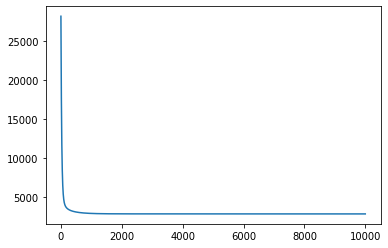

In [9]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('mse_score : {}\n'.format(mse))

plt.plot(losses)
plt.show()

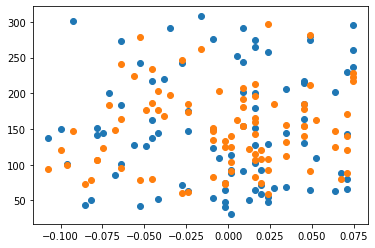

In [10]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predictions)
plt.show()

# 결론

이번에는 사이킷런에 있는 기본제공데이터인 당뇨병환자 데이터를 이용해 손실함수와 기울기 계산을 구현해보는 프로젝트를 진행해보았습니다.

LMS에서 배운 MSE 모델을 이용하여 입력받은 두 값의 차이에 제곱을 하는 공식을 이용하여 함수로 구현해 보고 이어서 loss함수를 구현해보았습니다.

마지막으로 w1 부터 w12까지 12개의 기울기(gradient)값과, b의 기울기(gradient)를 구하는 함수를 구현하여 최종적으로 모델학습과 손실함수를 구하여 그래프로 출력을 하는 것까지 해보았습니다.

# 회고

---



## - 이번 프로젝트에서 어려웠던 점

루브릭 지표에 있는 MSE 손실함수 값 3000이하를 달성하기 위해 에포크 횟수를 늘리면서 그에 맞게 학습률을 조절하여 3000점 이하를 달성하는 것이 꽤나 어려웠습니다.



---


## - 프로젝트를 진행하면서 알게된 점

무작정 학습횟수를 늘린다고 점수가 낮아지는 것이 아니라(어느 순간 기울기의 변화가 거의 없어짐) 적당한 학습 횟수와 학습률을 통해야만 최적의 학습률 값과 학습횟수를 지정하는 방법을 이해했습니다.


---


## - 루브릭 평가지표를 맞추기 위해 시도한 것들

학습횟수 늘려보기, 학습률 조절해보기 등...



---


## - 자기다짐

앞으로는 라이브러리 함수를 조금 더 자유자재로 다룰 수 있게 라이브러리 document 들을 짬날 때마다 해볼 예정입니다. 

# 프로젝트2

# (1) 데이터 가져오기

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

bike = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/train.csv') # 학습데이터 불러오기
print(bike.shape) # 데이터 형태확인
bike.head() # 데이터프레임 5줄 까지 확인

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [12]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

In [13]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

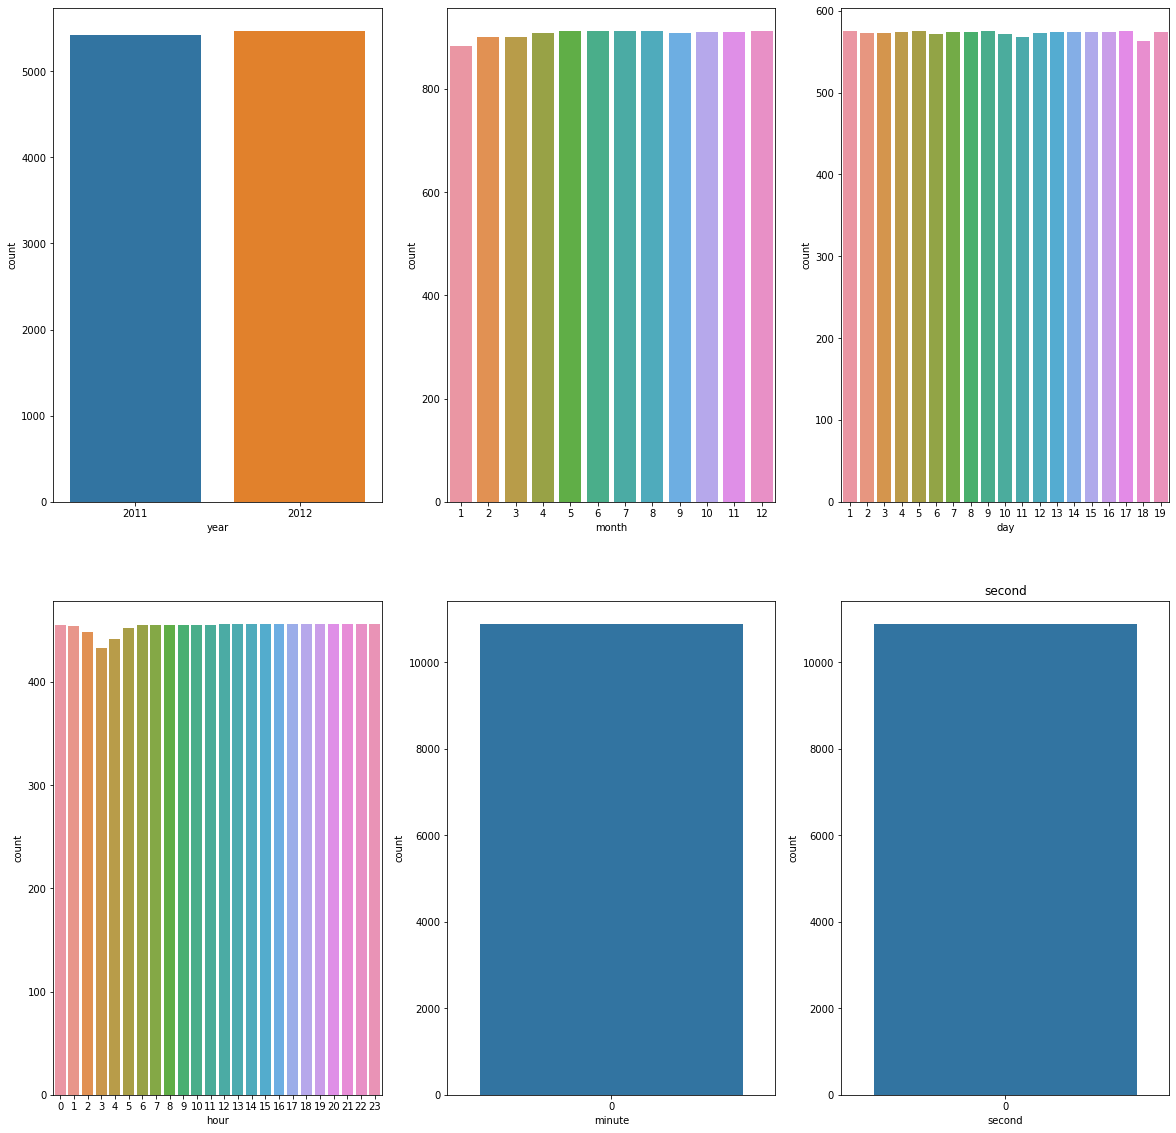

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(20,20))
sns.countplot(x = bike['year'], data = bike, ax=ax[0][0])
plt.title('year')
sns.countplot(x = bike['month'], data = bike, ax=ax[0][1])
plt.title('month')
sns.countplot(x = bike['day'], data = bike, ax=ax[0][2])
plt.title('day')
sns.countplot(x = bike['hour'], data = bike, ax=ax[1][0])
plt.title('hour')
sns.countplot(x = bike['minute'], data = bike, ax=ax[1][1])
plt.title('minute')
sns.countplot(x = bike['second'], data = bike, ax=ax[1][2])
plt.title('second')
plt.show

In [16]:
del bike['datetime'] # 상관계수를 구하기 위해 필요없는 컬럼 삭제

In [17]:
for i in bike.columns[:]:
  print('count와 {0}의 상관계수는 : {1}'.format(i,bike['count'].corr(bike[i]))) # 라벨 값인 count와의 상관계수를 확인하여 상관계수가 높은 casual과 registered 컬럼을 삭제해야겠다는 정보 확인. 

count와 season의 상관계수는 : 0.16343901657636162
count와 holiday의 상관계수는 : -0.005392984477774363
count와 workingday의 상관계수는 : 0.011593866091574371
count와 weather의 상관계수는 : -0.12865520103850622
count와 temp의 상관계수는 : 0.39445364496724905
count와 atemp의 상관계수는 : 0.38978443662697654
count와 humidity의 상관계수는 : -0.31737147887659456
count와 windspeed의 상관계수는 : 0.10136947021033277
count와 casual의 상관계수는 : 0.690413565328674
count와 registered의 상관계수는 : 0.9709481058098276
count와 count의 상관계수는 : 1.0
count와 year의 상관계수는 : 0.2604032973783149
count와 month의 상관계수는 : 0.16686223209772774
count와 day의 상관계수는 : 0.019825777342373587
count와 hour의 상관계수는 : 0.4006011941468474
count와 minute의 상관계수는 : nan
count와 second의 상관계수는 : nan


In [18]:
bike['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  minute      10886 non-null  int64  
 16  second      10886 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


# (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [20]:
bike.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [21]:
X = bike # 학습데이터 따로 저장
y = bike['count'] # 라벨값으로 쓰일 count 컬럼 y에 저장 
# 학습에 영향을 끼치지 않거나 연관되지 않은 컬럼들 삭제
del X['count'] 
del X['casual']
del X['registered']
del X['minute']
del X['second']

In [22]:
X.columns # 학습데이터 X 컬럼에 삭제가 되었는지 확인

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30) # train, test 데이터 분리


# (5) LinearRegression 모델 학습

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 선형회귀

model.fit(X_train, y_train)# 모델학습

LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [25]:
y_pred = model.predict(X_test)
y_pred

array([114.74686171, 126.01989935, -33.3552789 , ..., 211.21828919,
        84.85106079, 292.73508286])

In [26]:
def RMSE(a, b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  rmse = mse ** 0.5        # MSE의 제곱근
  return rmse

In [27]:
RMSE(y_test, y_pred)# 라벨 값과 예측 값 간의 RMSE값 확인. 

144.64215973406158

In [28]:
def MSE(a, b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  return mse

In [29]:
MSE(y_test, y_pred)# 라벨 값과 예측값 간의 MSE값 확인.

20921.354372533784

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

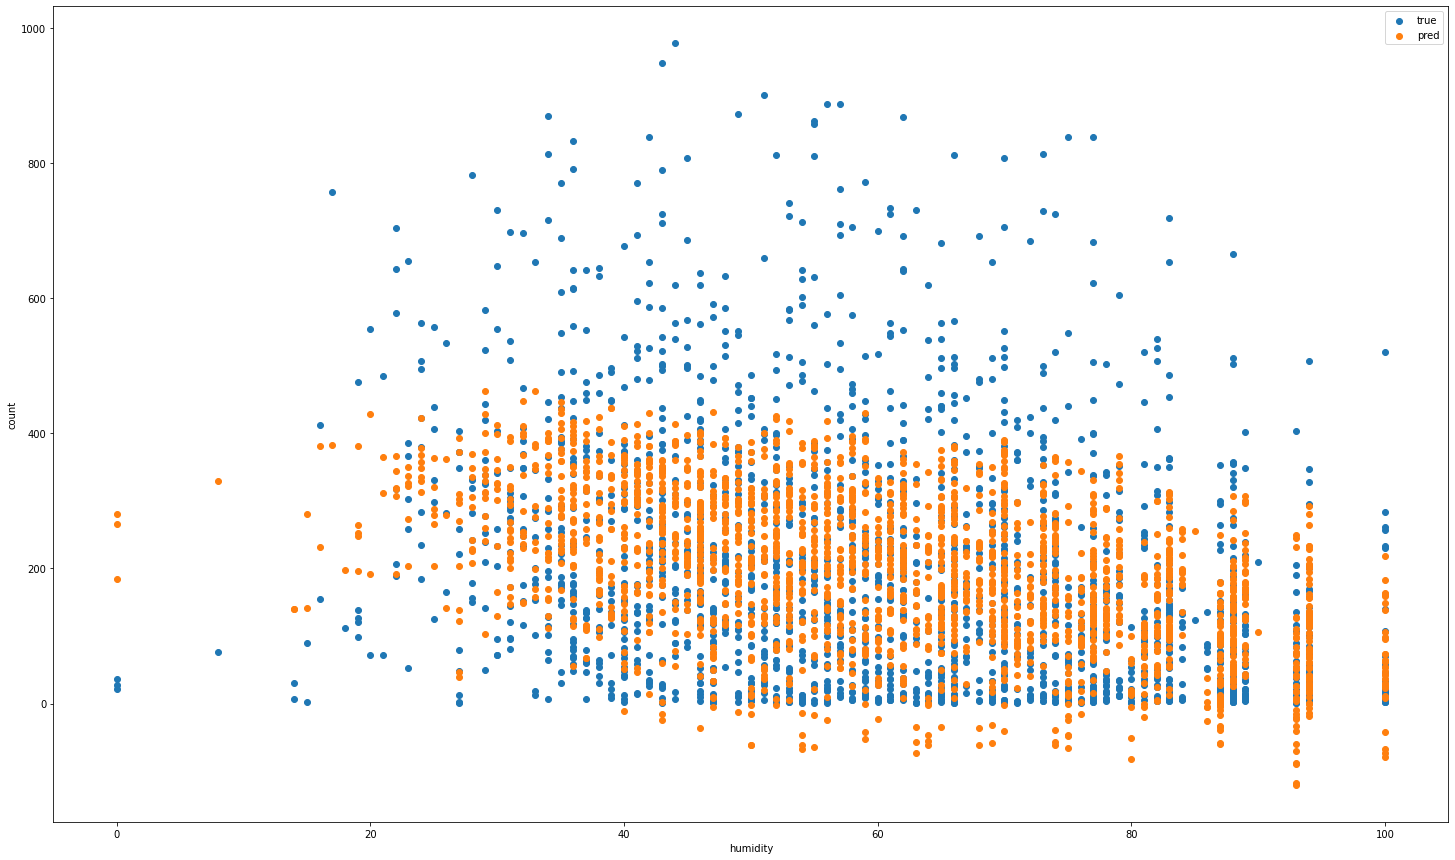

In [30]:
plt.figure(figsize=(25,15))
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], y_pred, label="pred")
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

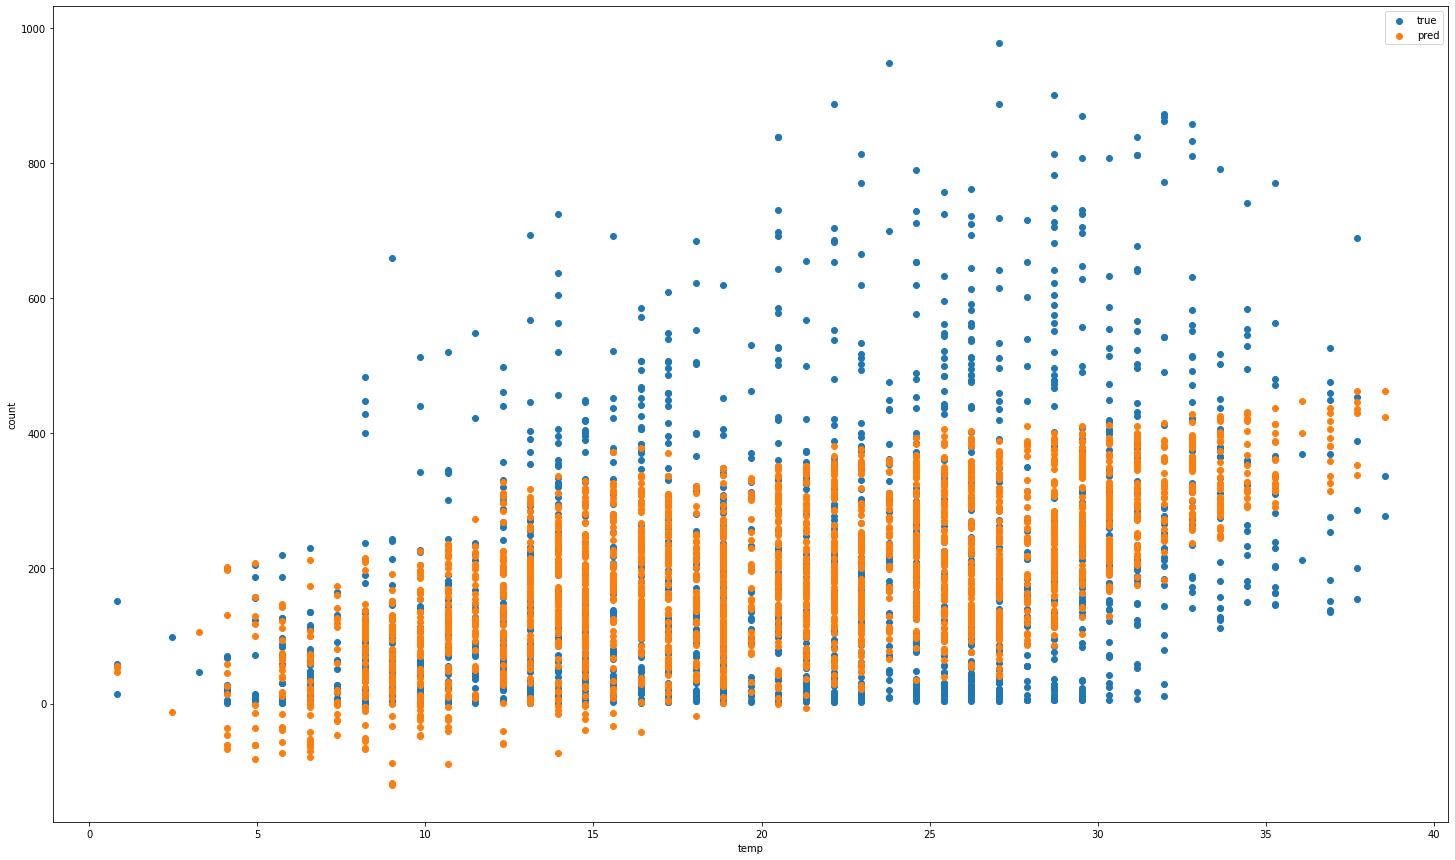

In [31]:
plt.figure(figsize=(25,15))
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], y_pred, label="pred")
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

# 결론

이번 프로젝트는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제를 해결 해보는 시간을 가졌습니다.

이 프로젝트에서 한 것은 
seaborn에 있는 sns.countplot를 활용해서 시각화하기 year, month, day, hour, minute, second 데이터 개수를 subplot으로 분할하여 시각화하였고 

sklearn의 LinearRegression 모델을 불러와 학습을 진행하였습니다

그리고 그 학습된 모델에 X_test를 입력해서 예측값을 출력하고
모델이 예측한 값과 label값간의 손실함수로 각 MSE, RMSE를 이용하여 손실함수 값을 계산하였습니다.

마지막으로 x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화를 하여 예측한 값이 얼마나 라벨과 맞아 떨이지는지도 확인해보았습니다.

# 회고

---



## - 이번 프로젝트에서 어려웠던 점
처음 활용해보는 to_datetime으로 자료형을 변환하는 것이 처음이라 조금 어려웠습니다.
그리고 상관계수 corr.()이용하는 것도 처음이라 사용하는데에 어려움이 있었습니다.




---


## - 프로젝트를 진행하면서 알게된 점

그래프가 여러개이고 축의 라벨을 정의할 때는 ax = plt.xlabel이 아니라 ax.set_xlabel이런 식으로 지정해줘야 오류가 나지않는다.


---


## - 루브릭 평가지표를 맞추기 위해 시도한 것들
라벨값 count와 학습데이터의 컬럼들 간의 상관계수를 구하여 count와 상관계수가 큰 값들의 컬럼을 삭제하고 컬럼자체에 minute,second와 같은 컬럼을 구성한 값들이 0으로 이루어진 컬럼들을 삭제하여 학습데이터를 가공한 후에 학습시켜 루브릭 평가지표인 RMSE 값 150 이하를 달성를 달성하였습니다. 




---


## - 자기다짐

역시나 프로젝트 2번 진행 후에도 새로운 함수사용이 어려웠어서 라이브러리 document를 살펴보고 필사를 해봐야 할 것 같다고 생각했습니다.

상관계수를 이용하여 타겟값과 상관성이 깊은 데이터를 찾아내서 학습데이터에서 삭제하는 것도 중요하지만, 여러 상황에 따라 팔요한 컬럼추가나 삭제를 할 수 있는 정도로 많은 데이터 EDA 연습을 해야겠다고 생각했습니다.



